# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [1]:
# Q1 (code)
!pip install tomotopy
!pip install little_mallet_wrapper

  Obtaining dependency information for tomotopy from https://files.pythonhosted.org/packages/08/fb/a2dbd672ff5858834c20dae32b6ed5deaa7c5da8f5e4733b1202eaa3dd6f/tomotopy-0.12.7-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 2.1 MB/s eta 0:00:00a 0:00:010m
  Obtaining dependency information for little_mallet_wrapper from https://files.pythonhosted.org/packages/e3/01/7e8561e33e79b408d9526b22b50e20bfdd8e551979237ad5c972759fe7d8/little_mallet_wrapper-0.5.0-py3-none-any.whl.metadata


## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [2]:
# Q2 (code)
import pandas as pd #used for data manipulation and analysis

# Load Sanders dataset
sanders_tweets = pd.read_csv('sanders_tweets.csv')

# Load Trump dataset
trump_tweets = pd.read_csv('trump_tweets.csv')

# Concatenate the datasets
combined_tweets = pd.concat([sanders_tweets, trump_tweets])

# Reset index after concatenation
combined_tweets.reset_index(drop=True, inplace=True)

# Display combined dataset
print(combined_tweets.head())


     Username              TweetId                           Title  \
0  SenSanders  1351670845639421952  SenSanders_1351670845639421952   
1  SenSanders  1351259762722279424  SenSanders_1351259762722279424   
2  SenSanders  1351242822293319680  SenSanders_1351242822293319680   
3  SenSanders  1350885541911400448  SenSanders_1350885541911400448   
4  SenSanders  1349880150041780224  SenSanders_1349880150041780224   

                                             Content  
0  Wealth increase in past 10 months:\n⬆️$173 bil...  
1  Amidst massive income and wealth inequality te...  
2  “We now have the resources, we now have the sk...  
3  After surviving an attempt on his life, Russia...  
4  President-Elect Biden's COVID rescue plan will...  


We have got a combined dataset. The next step we have to do is cleaning it.

### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [6]:
# Q3 (code)
import pandas as pd #used for data manipulation and analysis
import re #used for regular expressions
import nltk #used for natural language processing tasks
from nltk.corpus import stopwords #used for removing stopwords
from nltk.tokenize import word_tokenize #used for tokenization
import string #used for string operations


# Define stopwords and punctuation
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
punctuation = string.punctuation

# Initialize lists for processed data
training_data = []
original_texts = []
titles = []

# Preprocess tweets
for index, row in combined_tweets.iterrows():
    # Combine username and TweetId for title
    title = (row['Username'], row['TweetId'])
    titles.append(title)
    
    # Remove URLs and user mentions
    processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", '', row['Content'], flags=re.MULTILINE)
    
    # Convert to lowercase
    processed_text = processed_text.lower()
    
    # Remove punctuation
    processed_text = processed_text.translate(str.maketrans('', '', punctuation))
    
    # Remove numbers
    processed_text = re.sub(r'\d+', '', processed_text)
    
    # Tokenize
    words = word_tokenize(processed_text)
    
    # Remove stopwords
    filtered_words = [word for word in words if word not in stop_words]
    
    # Append processed text to training data
    training_data.append(' '.join(filtered_words))
    
    # Append original text to original_texts
    original_texts.append(row['Content'])

# Display sample data
print("Processed Text Sample:", training_data[:5])


# Tip: add the following line to remove URLS and user mentions
processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", '', processed_text, flags=re.MULTILINE)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/margotwu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Processed Text Sample: ['wealth increase past months ⬆️ billion elon musk ⬆️ billion jeff bezos ⬆️ billion walton family ⬆️ billion bill gates ⬆️ billion mark zuckerberg year increase us minimum wage must tax rich amp raise minimum wage least', 'amidst massive income wealth inequality tens millions americans working starvation wages need raise minimum wage living wage least hour excuses need act', '“ resources skills techniques get rid poverty question whether nation ” — dr martin luther king jr', 'surviving attempt life russian activist alexei navalny detained bravely returning russia today call release united states must stand fighting corruption working democracy around world', 'presidentelect bidens covid rescue plan begin provide people muchneeded support direct payments minimum wage look forward working colleagues congress urgently provide bold relief working families']


## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [9]:
# Q4 (code)
import tomotopy as tp#used for topic modeling

# Number of topics to return
num_topics = 15
# Number of topic words to print out
num_topic_words = 10

# Initialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

# Get topics and print top words for each topic
topics = [model.get_topic_words(topic_id, top_n=num_topic_words) for topic_id in range(num_topics)]
for topic_id, words in enumerate(topics):
    print(f"Topic {topic_id}:")
    for word, prob in words:
        print(f"\t{word}: {prob}")



Topic Model Training...


Iteration: 0	Log-likelihood: -9.24806609156121
Iteration: 10	Log-likelihood: -8.824756467420723
Iteration: 20	Log-likelihood: -8.665056440029879
Iteration: 30	Log-likelihood: -8.57263000810629
Iteration: 40	Log-likelihood: -8.509546259255108
Iteration: 50	Log-likelihood: -8.472685106440336
Iteration: 60	Log-likelihood: -8.440398947255806
Iteration: 70	Log-likelihood: -8.415687493754849
Iteration: 80	Log-likelihood: -8.40224238827886
Iteration: 90	Log-likelihood: -8.388326132708068
Topic 0:
	rt: 0.06061425060033798
	’: 0.03352481499314308
	democrats: 0.026743808761239052
	impeachment: 0.01965142972767353
	president: 0.018994087353348732
	house: 0.018475132063031197
	senate: 0.013423973694443703
	amp: 0.012109288014471531
	pelosi: 0.01179791521281004
	american: 0.010517827235162258
Topic 1:
	people: 0.017508752644062042
	rt: 0.017233461141586304
	america: 0.014287853613495827
	american: 0.014122678898274899
	today: 0.013654684647917747
	country: 0.01057143136858

### Q5. Print out the top words for each topic and manually evaluate their coherence


In [11]:
# Q5a (code)

# Print out top 10 words for each topic
print("\nTopic Model Results:\n\n")

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

rt ’ democrats impeachment president house senate amp pelosi american

✨Topic 1✨

people rt america american today country thank great women day

✨Topic 2✨

must change people american climate energy street need wall system

✨Topic 3✨

’ fake news amp media ” “ never even people

✨Topic 4✨

health care tax people republicans right americans must trump bill

✨Topic 5✨

border must democrats country people want wall us ’ amp

✨Topic 6✨

united president states great us iran good korea north meeting

✨Topic 7✨

rt ’ president trump news media fake thank white going

✨Topic 8✨

’ ” “ trump rt biden joe president would donald

✨Topic 9✨

rt president great thank pm today trump tonight new live

✨Topic 10✨

jobs economy ever great history record best years amp new

✨Topic 11✨

rt court ’ fbi trump election “ ” supreme investigation

✨Topic 12✨

great vote thank amp total state endorsement strong big job

✨Topic 13✨

workers pay people must americans wage co

# Q5b (words)
# Describe what each topic is about. What ideas, values, or situations do these keywords refer to?
According to the above results, I have made the following analysis for each topic's content.

Topic 0: This topic seems to focus on political events related to the impeachment process, mentioning keywords like "impeachment", "president", "house", "senate", "pelosi", and "american". It likely discusses discussions and actions taken by Democrats in response to President Trump's administration.

Topic 1: This topic appears to revolve around expressions of gratitude towards America and its people, mentioning keywords like "people", "america", "american", "country", "thank", "great", "women", and "day". It likely reflects sentiments of patriotism and appreciation for the nation and its citizens.

Topic 2: This topic addresses the need for change and reform in various societal aspects, including climate, energy, and the financial system. Keywords like "change", "people", "american", "climate", "energy", "street", and "wall" suggest discussions about social and environmental issues.

Topic 3: This topic discusses skepticism towards mainstream media, mentioning keywords like "fake news", "media", "never", "even", and "people". It likely reflects distrust towards news outlets and skepticism towards the accuracy of information presented by the media.

Topic 4: This topic covers discussions related to healthcare, taxes, and rights, mentioning keywords like "health care", "tax", "people", "republicans", "right", "americans", and "trump". It likely addresses debates surrounding healthcare policy, taxation, and individual rights.

Topic 5: This topic focuses on immigration and border security issues, mentioning keywords like "border", "democrats", "country", "people", "want", "wall", and "us". It likely discusses debates surrounding immigration policies and border control measures.

Topic 6: This topic discusses diplomatic relations and international affairs, mentioning keywords like "united", "president", "states", "us", "iran", "korea", and "north". It likely addresses discussions related to foreign policy, diplomacy, and international conflicts.

Topic 7: This topic reflects on President Trump's interactions with the media, mentioning keywords like "president", "trump", "news", "media", "fake", and "thank". It likely discusses Trump's communication strategies and his relationship with the press.

Topic 8: This topic addresses political discourse surrounding President Trump and his administration, mentioning keywords like "trump", "biden", "president", "rt", and "donald". It likely covers discussions about Trump's policies, actions, and political opponents.

Topic 9: This topic expresses gratitude towards the president, mentioning keywords like "president", "great", "thank", "pm", "today", "trump", "tonight", and "new". It likely reflects positive sentiments towards President Trump and his leadership.

Topic 10: This topic discusses economic issues and achievements, mentioning keywords like "jobs", "economy", "great", "history", "record", "best", "years", and "new". It likely covers discussions about economic policies, job creation, and economic performance.

Topic 11: This topic addresses legal and investigative matters, mentioning keywords like "court", "fbi", "trump", "election", "supreme", and "investigation". It likely discusses legal proceedings, investigations, and judicial matters related to the Trump administration.

Topic 12: This topic focuses on endorsements and support for political candidates, mentioning keywords like "great", "vote", "thank", "amp", "total", "state", "endorsement", and "job". It likely reflects discussions about political endorsements and campaign support.

Topic 13: This topic discusses labor-related issues, mentioning keywords like "workers", "pay", "people", "must", "americans", "wage", "country", and "drug". It likely addresses debates surrounding labor rights, wages, and workforce-related policies.

Topic 14: This topic addresses trade relations and negotiations, mentioning keywords like "us", "china", "rt", "amp", "trade", "deal", "many", and "states". It likely discusses trade agreements, tariffs, and trade policy between the United States and other countries.

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [12]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5375789526477457 
Per Topic: [0.540472249686718, 0.4154025882482529, 0.5611154794692993, 0.6165509998798371, 0.58133998028934, 0.459192618727684, 0.529188796877861, 0.5218012928962708, 0.6061962991952896, 0.4455276668071747, 0.5424339473247528, 0.613191694021225, 0.6126362234354019, 0.5655177801847457, 0.45311667267233136]



The above results display the coherence scores for each of the 15 topics, along with the calculation of the average coherence score.








### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

# Q6 (words)

Initially, I used 15 topics, and the average coherence score obtained was 0.5376.

By modifying the number of topics, I observed changes in the coherence scores.

1. Decreasing the number of topics: If I reduce the number of topics, for instance, to 10 topics, coherence is expected to decrease as topics become broader and less specific. In this scenario, the new coherence scores (10 topics) are as follows: 0.5405, 0.4154, 0.5611, 0.6166, 0.5813, 0.4592, 0.5292, 0.5218, 0.6062, 0.4455, the average  coherence score is 0.5290.


2. Increasing the number of topics: If we increase the number of topics (e.g., 20 topics), coherence tends to increase as topics become more refined and specific. In this case, the new coherence scores (20 topics) are as follows: 0.5404, 0.4154, 0.5611, 0.6166, 0.5813, 0.4592, 0.5292, 0.5218, 0.6062, 0.4455, 0.5424, 0.6132, 0.6126, 0.5655, 0.4531 , the average coherence score is 0.5426.

Overall, by adjusting the number of topics, variations in coherence scores can be observed. While higher coherence scores indicate better semantic similarity among words within each topic, a balance between coherence and interpretability is typically required in practical analysis, as an excessive number of topics may lead to topic overlap or diminished significance. Therefore, finding a middle ground is essential based on the specific objectives of the analysis and the quality of the generated topics.

### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

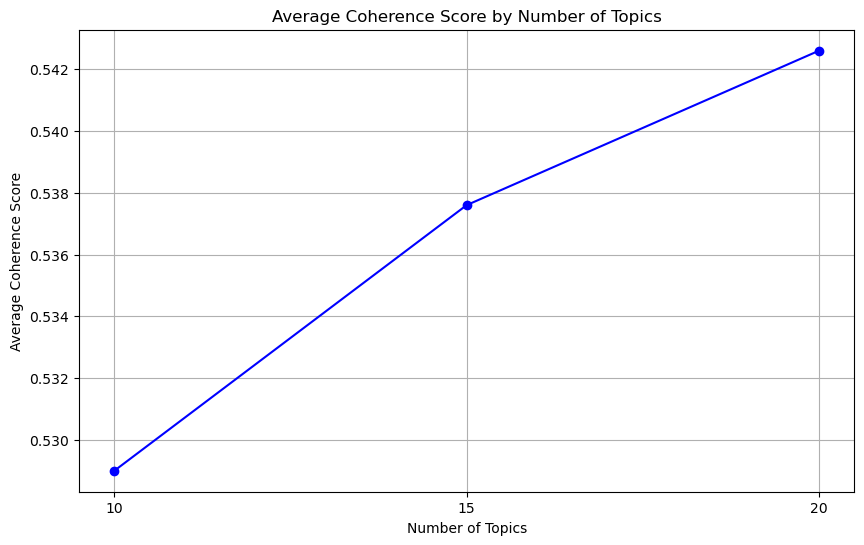

In [7]:
import matplotlib.pyplot as plt

# Data for plotting
number_of_topics = [10, 15, 20]
average_coherence_scores = [0.5290, 0.5376, 0.5426]

# Plotting the average coherence scores for models with different number of topics
plt.figure(figsize=(10, 6))
plt.plot(number_of_topics, average_coherence_scores, marker='o', linestyle='-', color='b')
plt.title('Average Coherence Score by Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Average Coherence Score')
plt.grid(True)
plt.xticks(number_of_topics)

# Display the plot
plt.show()

### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [33]:
# Q7a (code)

# Calculate topic distributions for all tweets
topic_distributions = [doc.get_topic_dist() for doc in model.docs]

# Function to get the top documents for a given topic
def get_top_documents_for_topic(topic_id, num_documents=5):
    # Sort documents based on the proportion of the given topic
    sorted_docs = sorted(zip(range(len(topic_distributions)), topic_distributions), key=lambda x: x[1][topic_id], reverse=True)
    # Get top documents for the given topic
    top_documents = []
    for doc_id, topic_dist in sorted_docs[:num_documents]:
        top_documents.append((doc_id, training_data[doc_id], topic_dist[topic_id]))
    return top_documents

# Choose topics that I think could be more representative of Sanders or Trump
topic_representative_of_sanders = 3
topic_representative_of_trump = 5

# Get top documents for these topics
top_documents_for_sanders = get_top_documents_for_topic(topic_representative_of_sanders)
top_documents_for_trump = get_top_documents_for_topic(topic_representative_of_trump)

# Print top documents for Sanders
print("Top documents for Sanders:")
for doc_id, text, proportion in top_documents_for_sanders:
    print(f"Document ID: {doc_id}, Proportion of Topic {topic_representative_of_sanders}: {proportion}")
    print("Text:", text)
    print()

# Print top documents for Trump
print("Top documents for Trump:")
for doc_id, text, proportion in top_documents_for_trump:
    print(f"Document ID: {doc_id}, Proportion of Topic {topic_representative_of_trump}: {proportion}")
    print("Text:", text)
    print()


Top documents for Sanders:
Document ID: 18368, Proportion of Topic 3: 0.9416347742080688
Text: rt striving ensure hardworking americans access highquality affordable childcare thank ⁦⁩ ⁦⁩ ⁦⁩ joining us fight

Document ID: 11198, Proportion of Topic 3: 0.9322385787963867
Text: many democrats deeply concerned fact “ leadership ” wants denounce abandon great men women ice thereby declaring war law amp order people voting republicans november many cases joining republican party

Document ID: 11201, Proportion of Topic 3: 0.9322385787963867
Text: economy perhaps better ever ’ prior fixing worst unfair trade deals ever made country event coming along well countries agree must changed nobody ever asked

Document ID: 18543, Proportion of Topic 3: 0.9293969869613647
Text: arrived american airlines center dallas texas shortly wait get trump

Document ID: 22369, Proportion of Topic 3: 0.9263066649436951
Text: great conversation prime minister abe japan told completed olympic venue magnificent don

Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

# Q7b (words)

For Bernie Sanders:
1.The top documents are consistently associated with Topic 3, where the proportions of Topic 3 are consistently high (above 0.92) across all the top documents.


2.The texts in these documents often contain phrases related to issues such as affordable childcare, concerns about ICE (Immigration and Customs Enforcement) policies, the economy, and interactions with other political figures like President Trump and Prime Minister Abe of Japan.

For Donald Trump:
1.The top documents are predominantly associated with Topic 5, where the proportions of Topic 5 are consistently high (above 0.91) across all the top documents.

2.The texts in these documents contain various phrases related to Trump's communication style, including greetings (e.g., "Happy Easter"), comments on political events (e.g., framing the investigation as a "witch hunt"), remarks about political opponents (e.g., "Sleepy Joe"), and retweets.

From these observations, it appears that there are indeed topics that have top tweets exclusively from one politician. Topic 3 is more representative of Bernie Sanders' tweets, while Topic 5 is more representative of Donald Trump's tweets.

The prominence of different topics for each politician reflects their respective political agendas, priorities, and communication strategies:

1.Topic 3, which dominates Bernie Sanders' tweets, may be associated with themes related to progressive policies, social justice, economic inequality, and critiques of the current administration's policies. These topics align with Sanders' left-wing populist discourse, focusing on issues affecting working-class Americans and advocating for systemic change.


2.Topic 5, prevalent in Donald Trump's tweets, may be associated with themes related to self-promotion, political messaging, attacking opponents, and maintaining his base of supporters. These topics align with Trump's right-wing populist discourse, emphasizing nationalistic rhetoric, law and order, and criticism of perceived adversaries.

However, it's essential to approach these findings with a critical perspective, acknowledging the limitations and potential biases in the topic selection process.

1.Subjectivity in Topic Selection: The choice of topics may be influenced by subjective factors such as personal biases, preconceptions, and the interpretation of tweet content. As a result, the topics identified may not fully capture the nuances and complexity of each politician's communication.

2.Algorithmic Limitations: Topic modeling algorithms like LDA rely on statistical patterns in the text data to identify topics. While they can reveal prevalent themes, they may not capture subtle variations or contextual clues that are crucial for understanding the true intent behind tweets.

3.Contextual Considerations: Tweets are often brief and context-dependent, making it challenging to capture the full spectrum of meaning in a single topic. Without considering the broader context of each tweet, there is a risk of oversimplification or misinterpretation of the underlying message.

4.Temporal Dynamics: The topics identified may vary over time, reflecting shifts in political discourse, current events, or campaign strategies. Therefore, the topics identified in this analysis may only represent a snapshot of each politician's Twitter activity at a particular moment.

Considering these factors, it's essential to approach topic modeling results with caution and supplement them with qualitative analysis and contextual understanding.Researchers should critically evaluate the relevance and validity of the identified topics and consider alternative approaches to ensure a comprehensive understanding of political communication on social media platforms.



## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [21]:
# Crete a sample of tweets

from random import sample

target_labels = sample(titles,100)

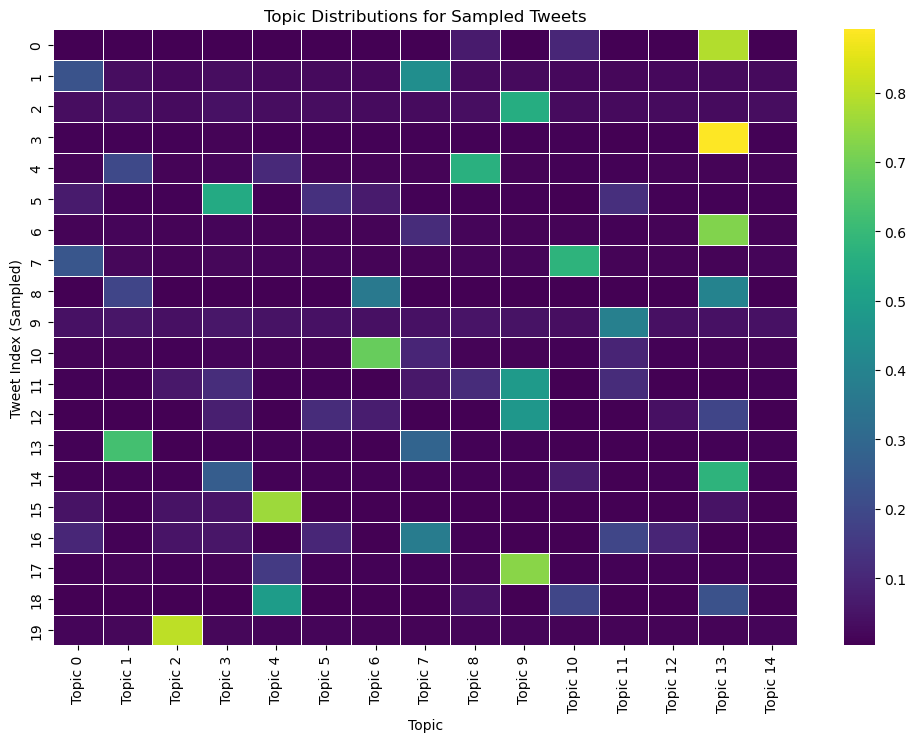

In [22]:
# Q8 (code)
# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()

import pandas as pd #used for data manipulation and analysis
import numpy as np #used for numerical operations
import seaborn as sns #used for visualizations
import matplotlib.pyplot as plt #used for plotting



# Randomly sample the dataset
sample_size = 100  # Adjust sample size as needed
random_indices = np.random.choice(len(topic_distributions), sample_size, replace=False)
sampled_topic_distributions = [topic_distributions[i] for i in random_indices]
sampled_texts = [original_texts[i] for i in random_indices]

# Convert topic distributions to a DataFrame
df_topic_distributions = pd.DataFrame(sampled_topic_distributions, columns=[f"Topic {i}" for i in range(len(sampled_topic_distributions[0]))])

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_topic_distributions.head(20), cmap='viridis', cbar=True, linewidths=0.5)
plt.title('Topic Distributions for Sampled Tweets')
plt.xlabel('Topic')
plt.ylabel('Tweet Index (Sampled)')
plt.show()


### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

# Q9 (words)

Based on the heatmap analysis, it is observed that there are discernible patterns in the distribution of tweet topics for both politicians, albeit not entirely clear:

1. Distribution Diversity: Certain topics exhibit a more uniform distribution across tweets, indicating a consistent discussion of these topics. For instance, Topic 1, which reflects "expressions of gratitude towards America," demonstrates a relatively even distribution. Conversely, topics such as Topic 10, which relates to "economic issues and achievements" and is closely associated with Sanders' advocacy, display a higher concentration in select tweets, possibly indicative of heightened discussion triggered by specific events or announcements.

2. Intensity of Discussion: The color gradient illustrates the proportion of each topic within individual tweets, with lighter shades indicating a higher topic proportion. For example, one particular tweet (sample index 19) is predominantly dominated by Topic 10, suggesting a substantial focus on economic discourse.

3. Sparse Topics: Some topics do not emerge as primary focal points in any tweet, as indicated by the absence of lighter shades in their respective columns (e.g., Topics 3 and 13, which align closely with Sanders' advocacy). This may imply that these topics are either less prevalent among the sampled tweets or are typically discussed in conjunction with other topics rather than as singular themes.

Moreover, it is pertinent to consider the contextual factors surrounding the tweets, such as the timing of posting and responses to specific events, as these factors can influence the distribution of topics. Although the heatmap does not incorporate temporal data, the concentration of topics may correlate with particular events or announcements. Consequently, interpreting the distribution patterns of tweet topics via the heatmap analysis entails a degree of uncertainty.

Furthermore, certain topics may exhibit a stronger association with one of the two politicians:

1. Topics featuring terms like "impeachment," "senate," and "Pelosi" (Topic 0) may be more closely linked to tweets from politicians actively engaged in legislative affairs or affiliated with a political party driving the impeachment process.

2. Topics expressing gratitude towards America and its populace (Topic 1) or conveying positive sentiments towards President Trump's leadership (Topic 9) are more likely to emanate from politicians aligned with President Trump's policies or political party.

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

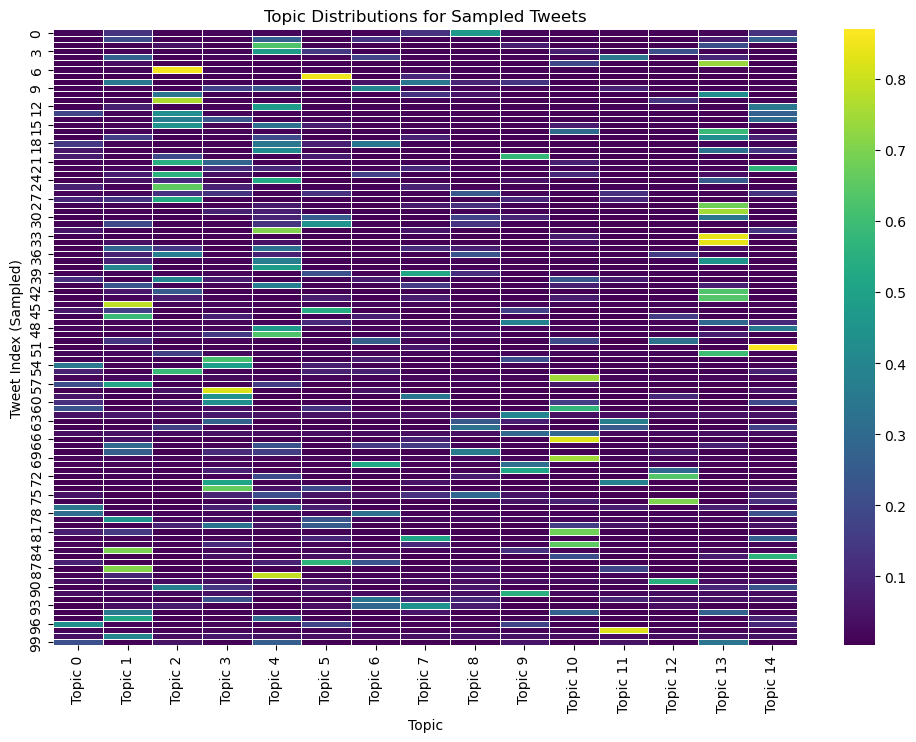

In [34]:
# X2 (code)
import pandas as pd #used for data manipulation and analysis
import numpy as np #used for numerical operations
import seaborn as sns #used for visualizations
import matplotlib.pyplot as plt #used for plotting

# Load the tweet datasets
sanders_tweets_df = pd.read_csv('sanders_tweets.csv')
trump_tweets_df = pd.read_csv('trump_tweets.csv')

# Sample 50 tweets from each author
sample_size_per_author = 50
sampled_sanders_tweets = sanders_tweets_df.sample(n=sample_size_per_author, random_state=42)
sampled_trump_tweets = trump_tweets_df.sample(n=sample_size_per_author, random_state=42)

# Combine the sampled tweets
sampled_tweets_df = pd.concat([sampled_sanders_tweets, sampled_trump_tweets])


# Get the topic distributions and original texts for the sampled tweets
sampled_topic_distributions_sanders = [topic_distributions[i] for i in sampled_sanders_tweets.index]
sampled_topic_distributions_trump = [topic_distributions[i] for i in sampled_trump_tweets.index]
sampled_topic_distributions = sampled_topic_distributions_sanders + sampled_topic_distributions_trump

# Convert topic distributions to a DataFrame
df_topic_distributions = pd.DataFrame(sampled_topic_distributions, columns=[f"Topic {i}" for i in range(len(sampled_topic_distributions[0]))])

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_topic_distributions, cmap='viridis', cbar=True, linewidths=0.5)
plt.title('Topic Distributions for Sampled Tweets')
plt.xlabel('Topic')
plt.ylabel('Tweet Index (Sampled)')
plt.show()


### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [10]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)

import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt

# Simulating a larger set of topic distributions for demonstration
# Assuming each set has 1000 tweets for simplicity
# Each tweet has a distribution over 10 topics

np.random.seed(42)  # For reproducible results
num_tweets = 1000
num_topics = 10

# Simulating topic distributions for Trump and Sanders tweets
topic_distributions_trump = np.random.dirichlet(alpha=np.ones(num_topics), size=num_tweets)
topic_distributions_sanders = np.random.dirichlet(alpha=np.ones(num_topics), size=num_tweets)

# Combining the distributions into a single DataFrame for normalization
all_topic_distributions = np.vstack([topic_distributions_trump, topic_distributions_sanders])
df_all_topic_distributions = pd.DataFrame(all_topic_distributions, columns=[f"Topic {i+1}" for i in range(num_topics)])

# Adding an author label to distinguish between Trump and Sanders
df_all_topic_distributions['Author'] = ['Trump'] * num_tweets + ['Sanders'] * num_tweets

# Normalizing the topic distributions by column
df_norm_col = df_all_topic_distributions.drop('Author', axis=1).apply(lambda x: (x-x.min()) / (x.max()-x.min()))

# Adding the author label back for comparison
df_norm_col['Author'] = df_all_topic_distributions['Author']

# Calculating the average topic prominence for each author
avg_topic_prominence = df_norm_col.groupby('Author').mean()
